# Individual Assignment

#### 1.1 Import Section

In [892]:
from dataset import Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [893]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
def Model_Prep (myDF, features, scale = None ) :
    dfe = myDF
    y=dfe["left"]
    X=dfe[features]
    X=pd.get_dummies(X,drop_first=True)
    if scale is not None:
        scaler = scale
        X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    logreg = LogisticRegression()
    kfold = model_selection.KFold(n_splits=5, random_state=7)
    modelCV = LogisticRegression()
    scoring = 'accuracy'
    results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
    print("5-fold cross validation average accuracy: %.2f" % (results.mean()))
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(
        logreg.score(X_test, y_test)))
    ##----
    predictions = logreg.predict(X_test)
    print(classification_report(y_test, predictions))

    ##----
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

#### 1.2 Data Load

In [895]:
df = pd.read_csv('turnover.csv')

### Exploratory Data Analysis.
Now, let's check our data and get more details

In [896]:
df.head(2)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   

   salary  
0     low  
1  medium

In [897]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [831]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

Total number of records is **14,999**

Now, let's Check **null** values

In [832]:
nulls = df.isnull().sum()[df.isnull().sum() > 0]
nulls

Series([], dtype: int64)

 **No null** values found, seems to have a cleaned data, so lets move forward and check individually all  **10** columns and how many values are there., 

Value counts for **satisfaction_level**

In [833]:
df['satisfaction_level'].value_counts().head(2)

0.10    358
0.11    335
Name: satisfaction_level, dtype: int64

In [834]:
df['satisfaction_level'].value_counts().count()

92

For the satisfaction_level, we have **92** values with 358 unique values for satisfaction percentage of **10**

Value counts for **last_evaluation**

In [835]:
df['last_evaluation'].value_counts().head(2)

0.55    358
0.50    353
Name: last_evaluation, dtype: int64

In [836]:
df['last_evaluation'].value_counts().count()

65

For the last_evaluation we have **65** values with **358** unique values for last evaluation percentage of **55**

Value counts for **number_project**

In [837]:
df['number_project'].value_counts().head(2)

4    4365
3    4055
Name: number_project, dtype: int64

In [838]:
df['number_project'].value_counts().count()

6

For the number_project we have **6** values with **4365** unique values for the employees performed **4** projects

Value counts for **average_montly_hours**

In [839]:
df['average_montly_hours'].value_counts().head(2)

156    153
135    153
Name: average_montly_hours, dtype: int64

In [840]:
df['average_montly_hours'].value_counts().count()

215

For the average_montly_hours we have **215** different values

Value counts for **time_spend_company**

In [841]:
df['time_spend_company'].value_counts().head(2)

3    6443
2    3244
Name: time_spend_company, dtype: int64

In [842]:
df['time_spend_company'].value_counts().count()

8

For the average_montly_hours we have **8** different values  with **1473** staff who have stayed for **five** years in the company

Value counts for **Work_accident**

In [843]:
df['Work_accident'].value_counts().head(2)

0    12830
1     2169
Name: Work_accident, dtype: int64

For the average_montly_hours we have **2169** employees had an accident in the company

Value counts for **left**

In [844]:
df['left'].value_counts().head(2)

0    11428
1     3571
Name: left, dtype: int64

Value counts for **promotion_last_5years**

In [845]:
df['promotion_last_5years'].value_counts().head(2)

0    14680
1      319
Name: promotion_last_5years, dtype: int64

For the LAST FIVE YEARS we have only **319** employees who have been promoted out of **14999** which is very very low

Value counts for **sales**

In [846]:
df['sales'].value_counts().head()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
Name: sales, dtype: int64

In [847]:
df['sales'].value_counts().count()

10

Value counts for **salary**

we have **10** different departments in the company and the sales department has the highest number of employees with **4140**

In [848]:
df['salary'].value_counts().head()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

we have **3** different categories for salaries in the company with low,medium, and high.

As can be seen, this data represents all staff weather they have left the company or not and our columns descritipns are as follows:

1. **satisfaction_level** is the percentage of the satisfaction 
2. **last_evaluation** is last evaluation satisfaction percentage
3. **number_project** is the number of projects the employee joined
4. **average_montly_hours** is the average number of hours my employee work monthly
5. **time_spend_company** is the number of years my employee worked in the company
6. **Work_accident** yes/no if my employee had an accident while working in the company
7. **left** yes/no if my employee had left the company or not
8. **promotion_last_5years** yes/no if my employee has promoted in the past five years or not
9. **sales** department that the employee work in
10. **salary** salary category (low,medium, and high)



From the above exploratory analysis we can observe the following for the **numerical** and **categorical** features:

**Numerical features**
<br>
We are having **5** nummerical features are as follows:
<br>
      **1. satisfaction_level**: with mean **0.61** and maximum value of **1**
<br>
      **2. last_evaluation**: with mean **0.72** and maximum value of **1**
<br>
      **3. number_project**: with mean **3.8** and maximum value of **7** projects
<br>
      **4. average_montly_hours**: with mean **201** and maximum value of **310** monthly average of employees' hours
<br>
      **5. time_spend_company**: with mean **3.5** years and maximum value of **10** years spent time of staff

**Categorical features**
<br>
In terms of categorical features we have **4** categorical features as follows:
<br>
      **1. sales**: we have 10 departments(**sales**, **technical** , **support**, **IT**, **product_mng**, **marketing** , **RandD**, **accounting**, **hr**, and **management**)
<br>
      **2. salary**: we have three main categorieas (**low**, **medium**, and **high**) 
<br>
      **3. Work_accident**: indicates if the employee **had an accident** during the work
<br>
      **4. promotion_last_5years**: indicate in the employee has been promoted in the last **five** years or not
      

**Target**
<br>
our target variable is **left** and it indicates if the employee had **left** or **not**


In order to proceed further and build our model we need to deeply investigate what we are predicting so let's see first our target base line as follows:

In [849]:
print(f'Company leave baseline is: {df.left.mean():.2f}')

Company leave baseline is: 0.24


Since the percentage of the staff whome already left is **24%** it is worth to mention here that the  the accuracy of our model will have an issue; since we don't know exactly the situation of the other 76%, they might stay or might leave so our model accuracy will be quetioned as we know already that **24%** with **100%** confidence!

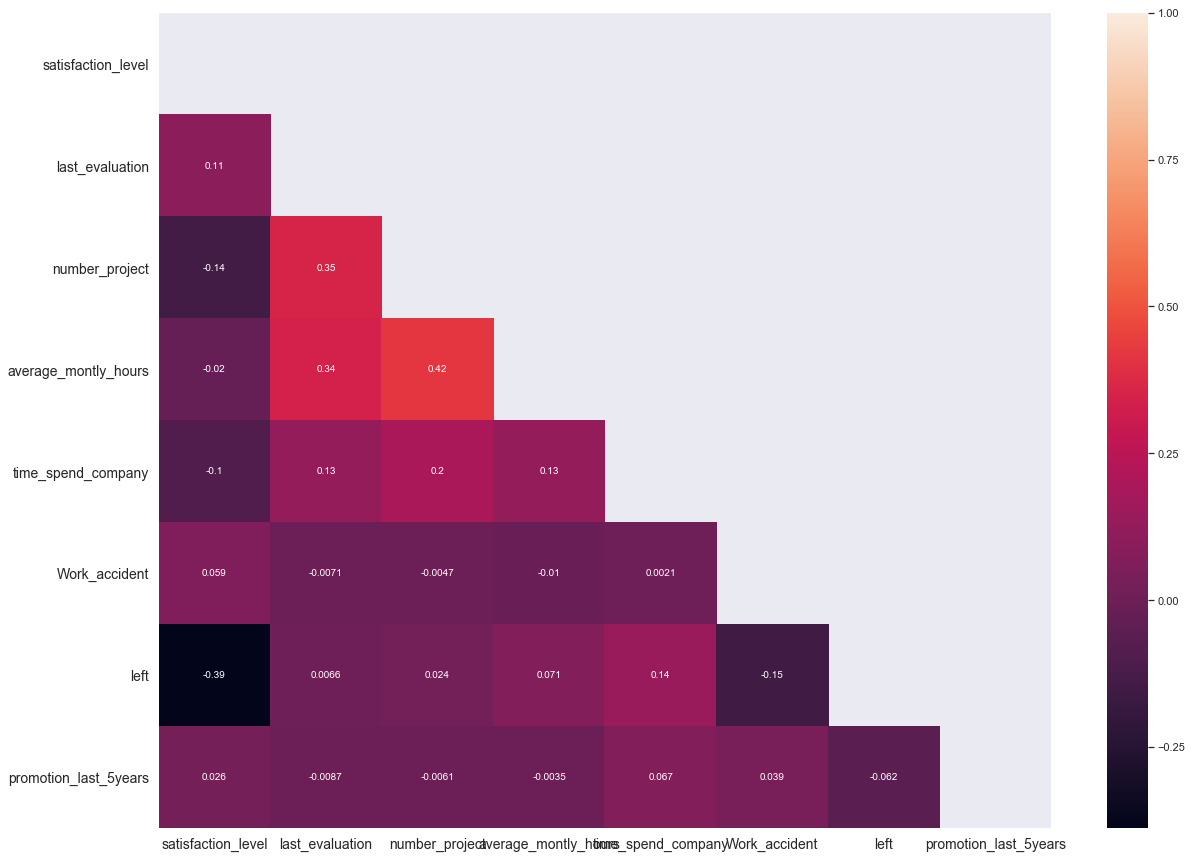

In [850]:
%matplotlib inline
df_plt =df.sort_values('left')
df_plt.reset_index(drop=True, inplace=True)
fix, ax = plt.subplots(figsize=(20,15))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df.corr(), annot=True, mask=mask, ax=ax)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
plt.show()

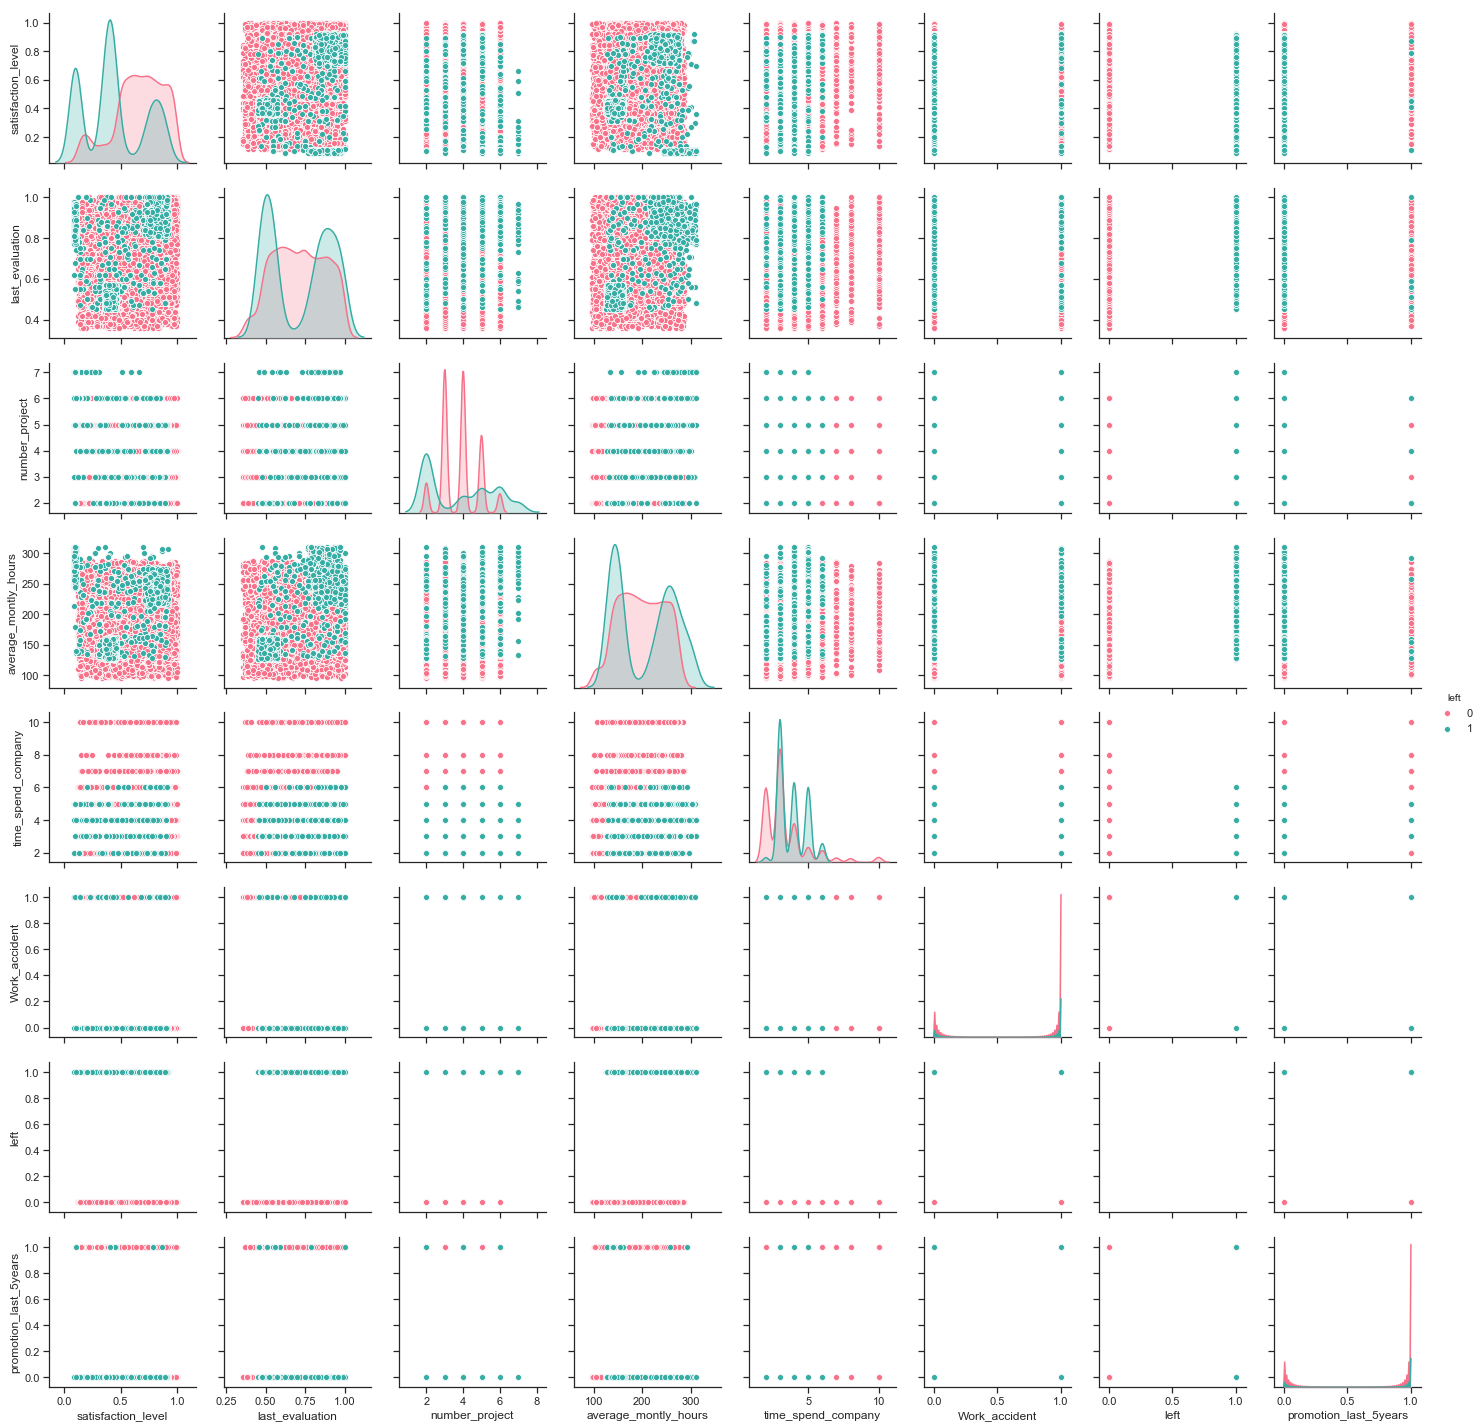

In [851]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df,hue="left", palette="husl")

Well, from the heat map and the pair plot it seems that there is not much correlated variables except for the average_monthly_hours and number_project but they are both stil not highly correlated which means that we could use all the features as predictors in out model, and try afterwards to generate more features to enhance our model!

In the following graphs, i'll try to see if there a relation between all features and our target variable (left).
let's start first with the satisfaction level

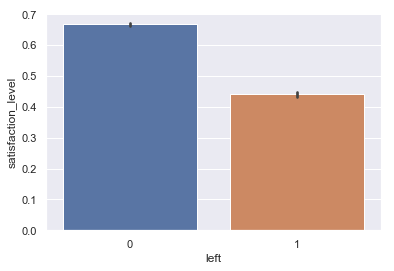

In [852]:
sns.set(rc={"figure.figsize": (6, 4)})
sns.barplot(x='left',y='satisfaction_level',data=df,saturation=0.75)
plt.show()

Seems to be normal as the employee whom already left were having low satisfaction level

In [853]:
fig = px.box(df, y="satisfaction_level")
fig.show()

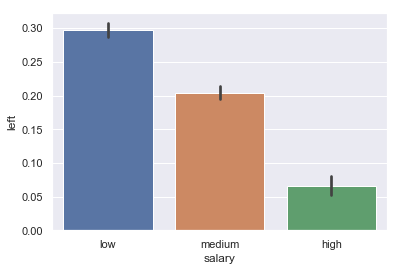

In [854]:
sns.set(rc={"figure.figsize": (6, 4)})
sns.barplot(x='salary',y='left',data=df,saturation=0.75)
plt.show()

Still normal observation since the high portion fall in the low salary category staff

In [855]:
fig = px.box(df, y="salary")
fig.show()

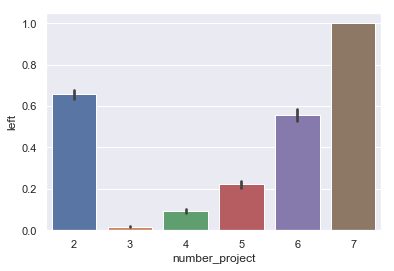

In [856]:
sns.set(rc={"figure.figsize": (6,4)})
sns.barplot(x='number_project',y='left',data=df,saturation=0.75)
plt.show()

This graph really interresting as it can be seen clearly that all the employees that had **7** projects already left which means that the company is loosing highly skilled staff, it is worth to mention as well that there is a significant amount of 65% of the staff are also left the company which somehow acceptable if they are leaving for a cabability issue during this small number of projects

In [857]:
fig = px.box(df, y="number_project")
fig.show()

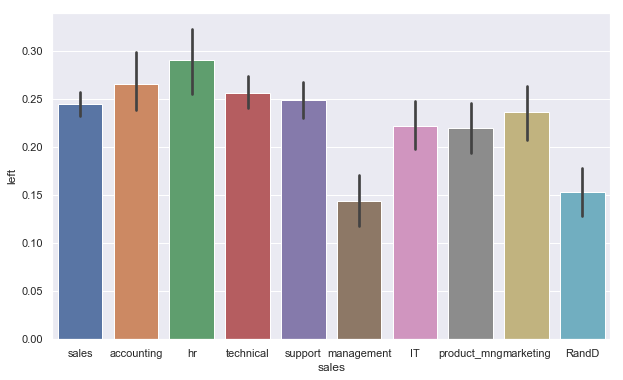

In [858]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.barplot(x='sales',y='left',data=df,saturation=0.75)
plt.show()

In [859]:
fig = px.box(df, x="sales", y="left")
fig.show()

In [860]:
fig = px.box(df, y="sales")
fig.show()

**accounting**, **hr**, and **technical** departments has the highest number of employees whome already left and this should be investigated by the company to see the reasons behind.

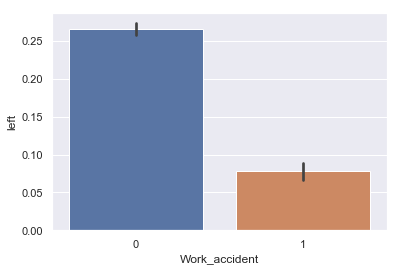

In [861]:
sns.set(rc={"figure.figsize": (6, 4)})
sns.barplot(x='Work_accident',y='left',data=df,saturation=0.75)
plt.show()

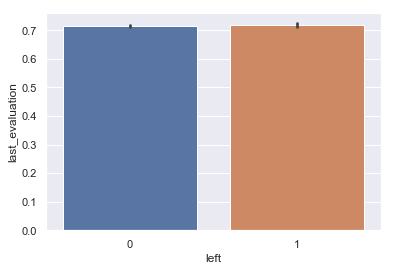

In [862]:
sns.set(rc={"figure.figsize": (6, 4)})
sns.barplot(x='left',y='last_evaluation',data=df,saturation=0.75)
plt.show()

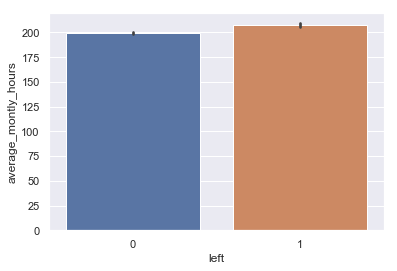

In [863]:
sns.set(rc={"figure.figsize": (6, 4)})
sns.barplot(x='left',y='average_montly_hours',data=df,saturation=0.75)
plt.show()

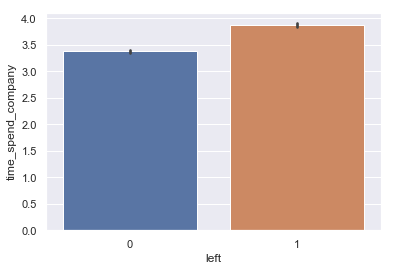

In [864]:
sns.set(rc={"figure.figsize": (6, 4)})
sns.barplot(x='left',y='time_spend_company',data=df,saturation=0.75)
plt.show()

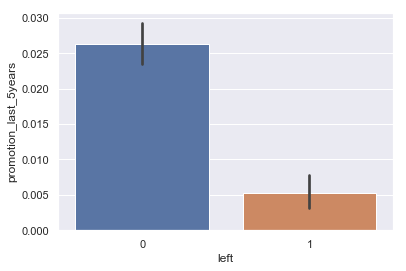

In [865]:
sns.set(rc={"figure.figsize": (6, 4)})
sns.barplot(x='left',y='promotion_last_5years',data=df,saturation=0.75)
plt.show()

In [867]:
fig = px.line(df, x="number_project", y="average_montly_hours", color="salary",
              line_group="sales", hover_name="sales")
fig.show()

In [868]:
fig = px.box(df, x="number_project", y="average_montly_hours")
fig.show()

In [869]:
fig = px.box(df, x="left", y="number_project")
fig.show()

In [870]:
fig = px.box(df, x="left", y="average_montly_hours")
fig.show()

In [871]:
fig = px.box(df, x="left", y="time_spend_company")
fig.show()

In [872]:
fig = px.box(df, x="left", y="last_evaluation")
fig.show()

Well, let's start to prepare our features for the modeling part to see how much is accuracy and we'll continue based on that to the feature engineering

In [900]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [901]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [902]:
All_Features = ['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 
                'time_spend_company', 'Work_accident','promotion_last_5years', 'sales', 'salary']

In [903]:
Numerical_Features = ['satisfaction_level', 'last_evaluation', 'number_project',
                      'average_montly_hours','time_spend_company']

In [904]:
Categorical_Features = ['Work_accident','promotion_last_5years', 'sales', 'salary']

#### Since we are going to use the logistic regression; which deals only  with numerical features, let's start by dummifying our categorical variables as follows

5-fold cross validation average accuracy: 0.80
Accuracy of logistic regression classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2299
           1       0.61      0.39      0.47       701

    accuracy                           0.80      3000
   macro avg       0.72      0.66      0.67      3000
weighted avg       0.78      0.80      0.78      3000



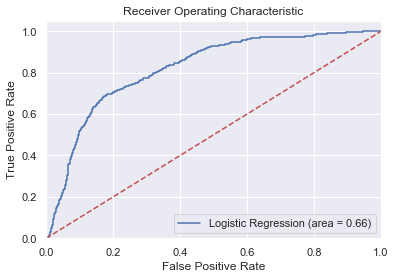

In [905]:
Model_Prep(df,All_Features)

So, in terms of baseline accuracy, my base line is **0.79** and my all next whole process will be directed to have a better score for accuracy

#### Standardize features

In [906]:
# StandardScaler then MinMaxScaler 

5-fold cross validation average accuracy: 0.79
Accuracy of logistic regression classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2299
           1       0.58      0.33      0.42       701

    accuracy                           0.79      3000
   macro avg       0.70      0.63      0.64      3000
weighted avg       0.76      0.79      0.76      3000



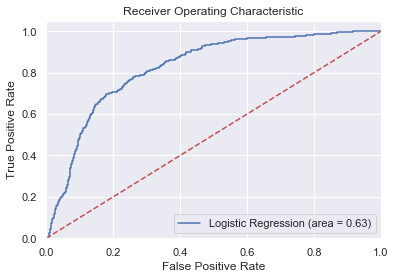

In [907]:
Model_Prep(df,All_Features, scale = StandardScaler() )

5-fold cross validation average accuracy: 0.79
Accuracy of logistic regression classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2299
           1       0.58      0.32      0.41       701

    accuracy                           0.79      3000
   macro avg       0.70      0.63      0.64      3000
weighted avg       0.76      0.79      0.76      3000



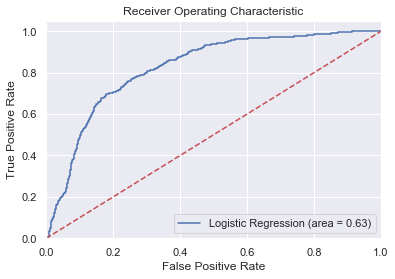

In [908]:
Model_Prep(df,All_Features, scale = MinMaxScaler() )

#### Fixing Skewness

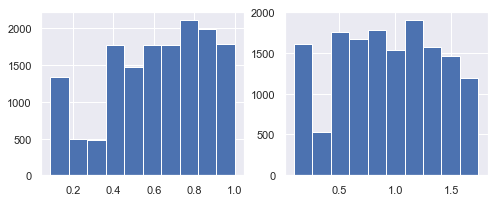

In [882]:
#ds = Dataset('turnover.csv')
#plt.figure(figsize=(8,3))
#plt.subplot(121)
#ds.features['satisfaction_level'].hist()

# Fix skewness
#ds.fix_skewness()

#plt.subplot(122)
#ds.features['satisfaction_level'].hist()
#plt.show()

In [909]:
#df = pd.DataFrame(ds.features)

In [910]:
#df.info()

#### Removing outliers

In [911]:
n_neighbors = 28
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination='auto')
y_pred = lof.fit_predict(df[Numerical_Features])
outliers = np.where(y_pred == -1)
df_no_outliers  = df.drop(df.index[outliers])
df_no_outliers.reset_index(inplace=True, drop=True)

5-fold cross validation average accuracy: 0.79
Accuracy of logistic regression classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2204
           1       0.65      0.42      0.51       702

    accuracy                           0.81      2906
   macro avg       0.74      0.67      0.69      2906
weighted avg       0.79      0.81      0.79      2906



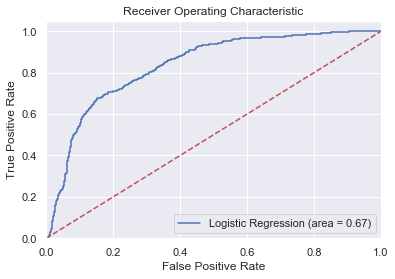

In [913]:
Model_Prep(df_no_outliers,All_Features, scale = MinMaxScaler() )

Let's check it without scaling

5-fold cross validation average accuracy: 0.80
Accuracy of logistic regression classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      2204
           1       0.67      0.45      0.54       702

    accuracy                           0.81      2906
   macro avg       0.76      0.69      0.71      2906
weighted avg       0.80      0.81      0.80      2906



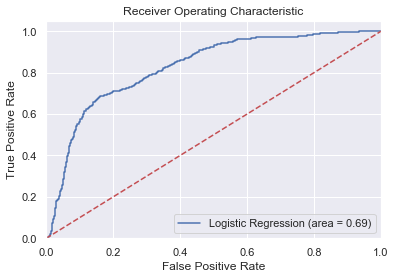

In [914]:
Model_Prep(df_no_outliers,All_Features)

#### Observation after taking out the outliers:
<br> Since taking out the outliers enhanced my model with accuracy of 81% and initially with number of neighbors = **20** and i tried to tweak a bit this parameter between **20** and then **40** and the best value was **28** , it enhanced my model to reach F1-Score with **54%** for 1's

#### Let's see as well if removing the skewness will enhance our model as well

In [946]:
df_numerical = df_no_outliers[Numerical_Features]
feature_skew = df_numerical.apply(lambda x: skew(x)).sort_values(ascending=False)

In [947]:
feature_skew

time_spend_company      0.048755
number_project         -0.020469
last_evaluation        -0.041979
average_montly_hours   -0.067932
satisfaction_level     -0.138104
dtype: float64

In [948]:
yj = PowerTransformer(method='yeo-johnson')
normed_features = yj.fit_transform(df_no_outliers[Numerical_Features])
df_no_outliers[Numerical_Features] = normed_features 

5-fold cross validation average accuracy: 0.80
Accuracy of logistic regression classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2204
           1       0.65      0.47      0.55       702

    accuracy                           0.81      2906
   macro avg       0.75      0.70      0.71      2906
weighted avg       0.80      0.81      0.80      2906



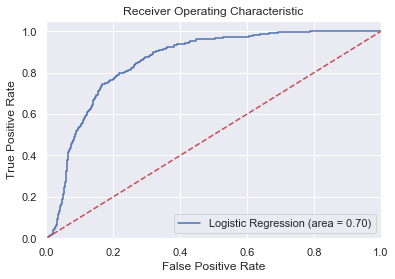

In [949]:
Model_Prep(df_no_outliers,All_Features)

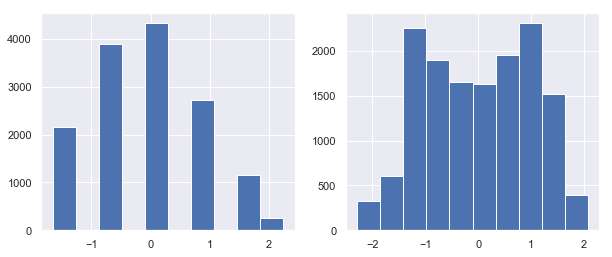

In [943]:
plt.figure(figsize=(10,4))
plt.subplot(121)
df_no_outliers['number_project'].hist()
plt.subplot(122)
df_no_outliers['average_montly_hours'].hist()

In [950]:
df_no_outliers['Cat_No_Projects']=df_no_outliers['number_project'].map(lambda x:'Low' if x < -1 
                                               else( 'Medium' if (x >= -1 and x <= 1) else 'High')   )
df_no_outliers['Cat_average_montly_hours']=df_no_outliers['average_montly_hours'].map(lambda x:'Low' if x < -1.5 
                                               else( 'Medium' if (x >= -1.5 and x <= 1.5) else 'High')   )
df_without_prj = df_no_outliers.drop('average_montly_hours', 1)
df_no_outliers['Cat_time_spend_company']=df_no_outliers['time_spend_company'].map(lambda x:'Class1' if x < -1 
                                               else( 'Class2' if (x > -1 and x < 0) 
                                                    else ( 'Class3' if (x >= 0 and x < 0.5) else 
                                                          ( 'Class4' if (x >= 0.5 and x <= 1.5) else 'Class5')))   )
df_without_prj = df_no_outliers.drop('time_spend_company', 1)
df_no_outliers['Cat_satisfaction_level']=df_no_outliers['satisfaction_level'].map(lambda x:'Unsatisfied' if x < -1 
                                               else( 'Satisfied' if (x >= -1 and x <= 1) else 'High_Unsatisfied')   )
df_without_prj = df_no_outliers.drop('satisfaction_level', 1)
df_no_outliers['Cat_last_evaluation']=df_no_outliers['last_evaluation'].map(lambda x:'Class1' if x < -1.75 
                                               else( 'Class2' if (x >= -1.75  and x < -1) 
                                                    else ( 'Class3' if (x >= -1 and x <= 0.8) else 'Class4'))   )
df_without_prj = df_no_outliers.drop('last_evaluation', 1)
New_Features = ['Cat_satisfaction_level', 'Cat_last_evaluation','Cat_average_montly_hours','Cat_No_Projects',
                'Cat_time_spend_company', 'Work_accident','promotion_last_5years', 'sales', 'salary']

5-fold cross validation average accuracy: 0.86
Accuracy of logistic regression classifier on test set: 0.87
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2204
           1       0.76      0.69      0.72       702

    accuracy                           0.87      2906
   macro avg       0.83      0.81      0.82      2906
weighted avg       0.87      0.87      0.87      2906



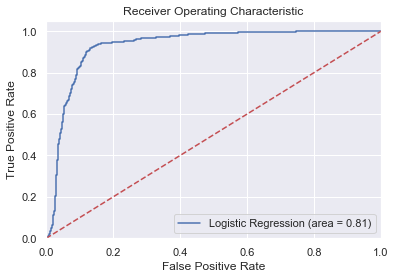

In [951]:
Model_Prep(df_without_prj,New_Features)

In [952]:
df_no_outliers['Cat_average_montly_hours']=df_no_outliers['average_montly_hours'].map(lambda x:'Low' if x < -1.5 
                                               else( 'Medium' if (x >= -1.5 and x <= 1.5) else 'High')   )
df_without_prj = df_no_outliers.drop('average_montly_hours', 1)
New_Features = ['satisfaction_level', 'last_evaluation','Cat_average_montly_hours','Cat_No_Projects',
                'time_spend_company', 'Work_accident','promotion_last_5years', 'sales', 'salary']

5-fold cross validation average accuracy: 0.86
Accuracy of logistic regression classifier on test set: 0.86
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2204
           1       0.75      0.66      0.70       702

    accuracy                           0.86      2906
   macro avg       0.82      0.79      0.81      2906
weighted avg       0.86      0.86      0.86      2906



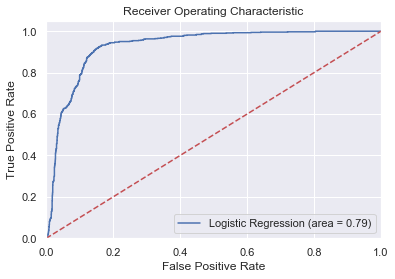

In [953]:
Model_Prep(df_without_prj,New_Features)

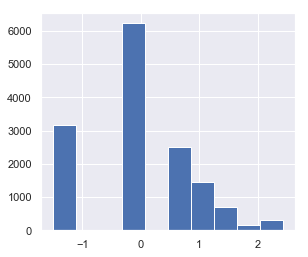

In [954]:
plt.figure(figsize=(10,4))
plt.subplot(121)
df_no_outliers['time_spend_company'].hist()

In [962]:
df_no_outliers['Cat_time_spend_company']=df_no_outliers['time_spend_company'].map(lambda x:'Class1' if x < -1 
                                               else( 'Class2' if (x > -1 and x < 0) 
                                                    else ( 'Class3' if (x >= 0 and x < 0.5) else 
                                                          ( 'Class4' if (x >= 0.5 and x <= 1.5) else 'Class5')))   )

df_without_prj = df_no_outliers.drop('time_spend_company', 1)
New_Features = ['satisfaction_level', 'last_evaluation','Cat_average_montly_hours','Cat_No_Projects',
                'Cat_time_spend_company', 'Work_accident','promotion_last_5years', 'sales', 'salary']

5-fold cross validation average accuracy: 0.87
Accuracy of logistic regression classifier on test set: 0.87
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2204
           1       0.78      0.66      0.71       702

    accuracy                           0.87      2906
   macro avg       0.84      0.80      0.82      2906
weighted avg       0.87      0.87      0.87      2906



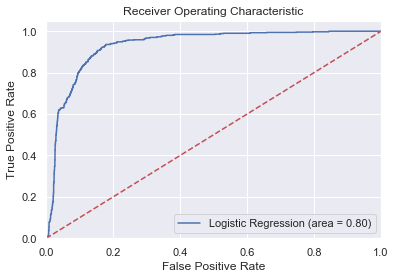

In [963]:
Model_Prep(df_without_prj,New_Features)

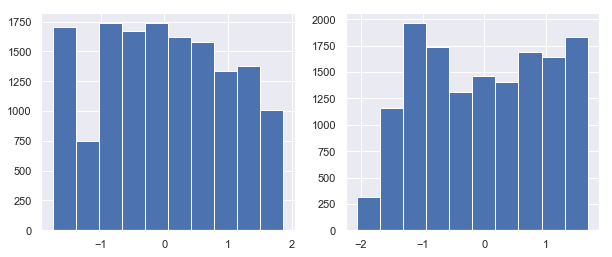

In [957]:
plt.figure(figsize=(10,4))
plt.subplot(121)
df_no_outliers['satisfaction_level'].hist()
plt.subplot(122)
df_no_outliers['last_evaluation'].hist()

In [958]:
df_no_outliers['Cat_satisfaction_level']=df_no_outliers['satisfaction_level'].map(lambda x:'Unsatisfied' if x < -1 
                                               else( 'Satisfied' if (x >= -1 and x <= 1) else 'High_Unsatisfied')   )

df_without_prj = df_no_outliers.drop('satisfaction_level', 1)
New_Features = ['Cat_satisfaction_level', 'last_evaluation','Cat_average_montly_hours','Cat_No_Projects',
                'Cat_time_spend_company', 'Work_accident','promotion_last_5years', 'sales', 'salary']

5-fold cross validation average accuracy: 0.87
Accuracy of logistic regression classifier on test set: 0.87
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2204
           1       0.78      0.67      0.72       702

    accuracy                           0.87      2906
   macro avg       0.84      0.80      0.82      2906
weighted avg       0.87      0.87      0.87      2906



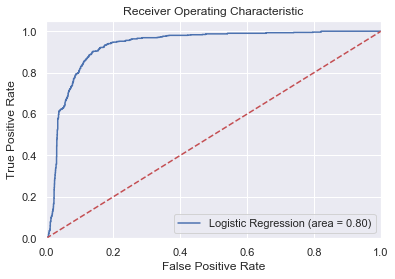

In [959]:
Model_Prep(df_without_prj,New_Features)

In [960]:
df_no_outliers['Cat_last_evaluation']=df_no_outliers['last_evaluation'].map(lambda x:'Class1' if x < -1.75 
                                               else( 'Class2' if (x >= -1.75  and x < -1) 
                                                    else ( 'Class3' if (x >= -1 and x <= 0.8) else 'Class4'))   )

df_without_prj = df_no_outliers.drop('last_evaluation', 1)
New_Features = ['Cat_satisfaction_level', 'Cat_last_evaluation','Cat_average_montly_hours','Cat_No_Projects',
                'Cat_time_spend_company', 'Work_accident','promotion_last_5years', 'sales', 'salary']

5-fold cross validation average accuracy: 0.88
Accuracy of logistic regression classifier on test set: 0.88
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2204
           1       0.78      0.71      0.75       702

    accuracy                           0.88      2906
   macro avg       0.85      0.82      0.83      2906
weighted avg       0.88      0.88      0.88      2906



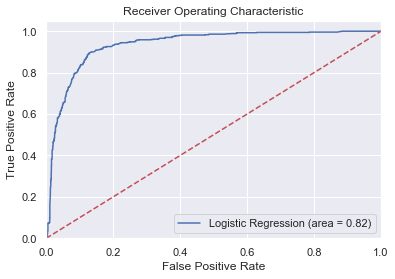

In [961]:
Model_Prep(df_without_prj,New_Features)

 let's create new features with binning, and since we have some number of projects then i think we can classify it to Three categories Low (number_project <3 ), Medium (number_project between 3 and 5 ), and High (number_project >5 )number of prjects 

it seems obviously that we have reached to a good score of accuracy and we need to do the same for time_spend_company,  then i think we can classify it to Three categories Low (spend <3 ), Medium (time_spend_company between 3 and 5 ), and High (time_spend_company > 5 )number of years

## Searching for important feature LogisticRegression

GridSearching Logistic regression

In [678]:
dfe = df_without_prj
y=dfe["left"]
X=dfe[New_Features]
X = pd.get_dummies(X,drop_first=True)
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=0)
dt = LogisticRegression()

print("DT CV training score:\t", cross_val_score(dt, X_train, y_train, cv=5,n_jobs=1).mean())
dt.fit(X_train, y_train)
print("DT test score:\t", dt.score(X_test, y_test))

TypeError: 'DecisionTreeClassifier' object is not subscriptable

In [660]:
# gridsearch params
dtc_params =  {'penalty':['l1','l2'],'solver':['liblinear'],'C':np.logspace(-3,0,50)}

# set the gridsearch
dtc_gs = GridSearchCV(dt,dtc_params, cv=5, verbose=1, n_jobs=-1)

In [661]:
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   11.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.001     , 0.0011514 , 0.00...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 

In [662]:
dtc_gs.best_score_
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'C': 0.022229964825261943, 'penalty': 'l1', 'solver': 'liblinear'}
0.8754925731332716


In [663]:
coef_df = pd.DataFrame({'coef': dtc_best.coef_[0],
                        'feature': X.columns,
                        'abs_coef': np.abs(dtc_best.coef_[0])})

coef_df.head(15)

coef                        feature  abs_coef
0   0.409327           average_montly_hours  0.409327
1  -0.405086                  Work_accident  0.405086
2  -0.110563          promotion_last_5years  0.110563
3  -0.578739     Cat_last_evaluation_Medium  0.578739
4   0.061675     Cat_satisfaction_level_Low  0.061675
5  -0.127607  Cat_satisfaction_level_Medium  0.127607
6   0.748837            Cat_No_Projects_Low  0.748837
7  -0.841548         Cat_No_Projects_Medium  0.841548
8  -0.963640     Cat_time_spend_company_Low  0.963640
9   0.107920  Cat_time_spend_company_Medium  0.107920
10 -0.049097                    sales_RandD  0.049097
11  0.000000               sales_accounting  0.000000
12  0.025166                       sales_hr  0.025166
13 -0.028401               sales_management  0.028401
14  0.000000                sales_marketing  0.000000

In [664]:
coef_df.sort_values('abs_coef', ascending=False, inplace=True)
coef_df.head(15)

coef                        feature  abs_coef
8  -0.963640     Cat_time_spend_company_Low  0.963640
7  -0.841548         Cat_No_Projects_Medium  0.841548
6   0.748837            Cat_No_Projects_Low  0.748837
3  -0.578739     Cat_last_evaluation_Medium  0.578739
0   0.409327           average_montly_hours  0.409327
1  -0.405086                  Work_accident  0.405086
19  0.331057                     salary_low  0.331057
20  0.169858                  salary_medium  0.169858
5  -0.127607  Cat_satisfaction_level_Medium  0.127607
2  -0.110563          promotion_last_5years  0.110563
9   0.107920  Cat_time_spend_company_Medium  0.107920
4   0.061675     Cat_satisfaction_level_Low  0.061675
10 -0.049097                    sales_RandD  0.049097
13 -0.028401               sales_management  0.028401
12  0.025166                       sales_hr  0.025166

## Searching for important feature using DecisionTreeClassifier

In [665]:
dfe = df_without_prj
y=dfe["left"]
X=dfe[New_Features]
X = pd.get_dummies(X,drop_first=True)
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()

print("DT CV training score:\t", cross_val_score(dt, X_train, y_train, cv=5,
                                                 n_jobs=1).mean())
dt.fit(X_train, y_train)
print("DT test score:\t", dt.score(X_test, y_test))

DT CV training score:	 0.9289935339271731
DT test score:	 0.9437815511702616


In [666]:
# gridsearch params
dtc_params = {
    'max_depth': range(1,20),
    'max_features': [None, 'log2', 'sqrt'],
    'min_samples_split': range(5,30),
    'max_leaf_nodes': [None],
    'min_samples_leaf': range(1,10)
}

from sklearn.model_selection import GridSearchCV
# set the gridsearch
dtc_gs = GridSearchCV(dt,
                      dtc_params, cv=5, verbose=1, n_jobs=-1)

In [667]:
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 12825 candidates, totalling 64125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 5112 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 13112 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 24312 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 37828 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 41384 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 49688 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 61688 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 64125 out of 64125 | elapsed:  4.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 20),
                         'ma

In [668]:
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': 17, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 18}
0.9309602957300898


In [669]:
fi = pd.DataFrame({
    'feature': X.columns,
    'importance': dtc_best.feature_importances_
})

fi.sort_values('importance', ascending=False, inplace=True)
fi.head(10)

feature  importance
7          Cat_No_Projects_Medium    0.428520
0            average_montly_hours    0.194122
4      Cat_satisfaction_level_Low    0.096920
9   Cat_time_spend_company_Medium    0.091603
3      Cat_last_evaluation_Medium    0.062433
8      Cat_time_spend_company_Low    0.032720
5   Cat_satisfaction_level_Medium    0.029684
6             Cat_No_Projects_Low    0.020410
1                   Work_accident    0.007621
16                    sales_sales    0.006950

<font color='lightBlack'>Creating a classification report using my test data</font>

In [670]:
predictions = best_logreg.predict(X_test)
print(classification_report(y_test, predictions))

ValueError: X has 21 features per sample; expecting 18

In [671]:
logit_roc_auc = roc_auc_score(y_test, best_logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(
    y_test, best_logreg.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression using gridsearch (area = %0.2f)' %
         logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: X has 21 features per sample; expecting 18

As well, let's find the optimal hyperparameters in order to predict who is going to leave the company using GridSearchCV

<font color='lightBlack'> 1. creating a hyperparameter dictionary for a logistic regression machine learning classification model</font>

In [672]:
left_gs_params = {'penalty': ['l1', 'l2'],
                    'solver': ['liblinear'],
                    'C': np.logspace(-3, 0, 50)}

<font color='lightBlack'>2. creating a gridsearch object using LogisticRegression() and the dictionary you created above
</font>

In [673]:
left_gs=GridSearchCV(LogisticRegression(),
                      left_gs_params,
                      n_jobs=-1,cv=5)

<font color='lightBlack'>3. fitting a gridsearch object on my training data
</font>

In [674]:
left_gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.001     , 0.0011514 , 0.00...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 

<font color='lightBlack'>printing out best parameters</font>

In [675]:
left_gs.best_params_

{'C': 0.022229964825261943, 'penalty': 'l1', 'solver': 'liblinear'}

<font color='lightBlack'>Getting the best estimator and then scoring my model on my testing data</font>

In [676]:
left_gs.best_score_

0.8754925731332716

In [677]:
best_logreg = left_gs.best_estimator_
best_logreg.score(X_test, y_test)

0.8790729692519504